In [53]:
#---------------------------------------------------------------Sentiment Analysis------------------------------------------------------------------

In [ ]:
import re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
df = pd.read_csv("C:/Users/91801/Desktop/Projects/Sentiment Analysis/dataset/Chatgpt_Reviews.csv")
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2/15/2025,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No
1,10/16/2024,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes
2,10/16/2024,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes
3,12/21/2024,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes
4,3/23/2025,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No


In [56]:
# drop duplicate rows
df.drop_duplicates(inplace=True)

In [57]:
#descritive Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               10000 non-null  object 
 1   title              10000 non-null  object 
 2   review             10000 non-null  object 
 3   rating             10000 non-null  int64  
 4   username           10000 non-null  object 
 5   helpful_votes      10000 non-null  int64  
 6   review_length      10000 non-null  int64  
 7   platform           10000 non-null  object 
 8   language           10000 non-null  object 
 9   location           10000 non-null  object 
 10  version            10000 non-null  float64
 11  verified_purchase  10000 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 937.6+ KB


In [58]:
df.describe()

,rating,helpful_votes,review_length,version
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.987000,50.347800,147.034000,3.651070
std,1.424161,28.914613,34.911708,0.438935
min,1.000000,0.000000,30.000000,3.000000
25%,2.000000,25.000000,122.000000,3.500000
50%,3.000000,50.000000,151.000000,4.000000
75%,4.000000,75.000000,176.000000,4.100000
max,5.000000,100.000000,199.000000,4.100000


In [59]:
df.describe(include="object")

,date,title,review,username,platform,language,location,verified_purchase
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,366,10,10000,9460,2,5,6,2
top,12/10/2024,Buggy,Resource plant behind vote its try laugh. Othe...,owilliams,Mobile,en,Canada,No
freq,44,1037,1,6,5011,2016,1711,5116


In [60]:
# change the type of date
df["date"] = pd.to_datetime(df["date"])

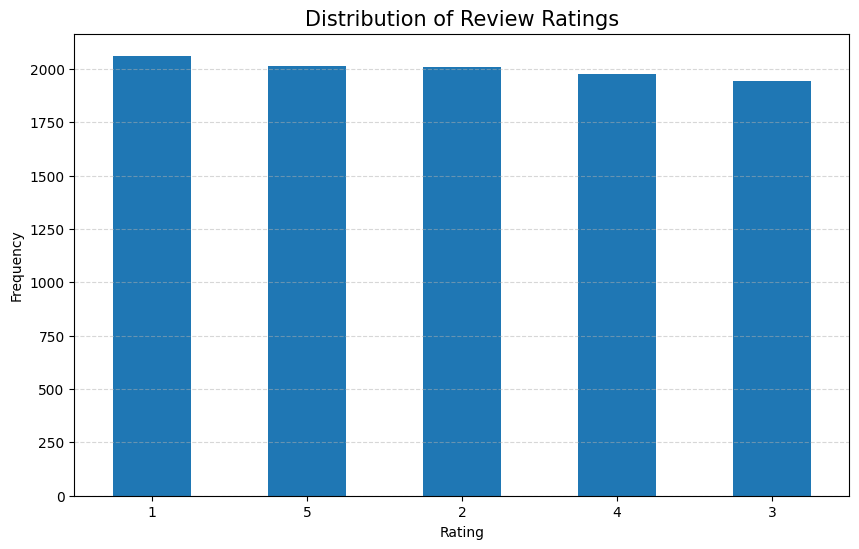

In [61]:
# distribution of review ratings

rating_counts = df["rating"].value_counts()

plt.figure(figsize=(10, 6))
rating_counts.plot(kind="bar")
plt.title("Distribution of Review Ratings", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

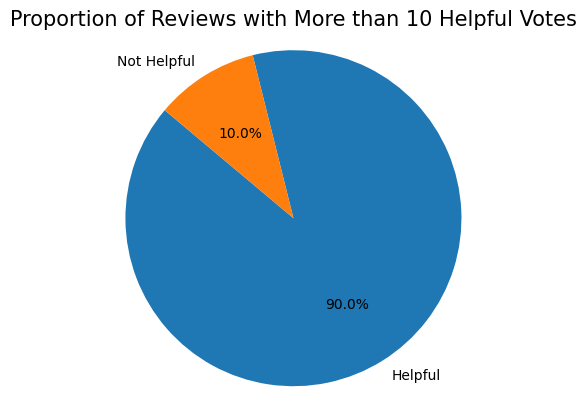

In [62]:
# review were marked as helpuful by given threshold

df["helpful"] = df["helpful_votes"] > 10
helpful_counts = df["helpful"].value_counts()

sizes = helpful_counts.values
plt.pie(sizes, labels=["Helpful", "Not Helpful"], autopct="%1.1f%%", startangle=140)
plt.title("Proportion of Reviews with More than 10 Helpful Votes", fontsize=15)
plt.axis("equal")
plt.show()

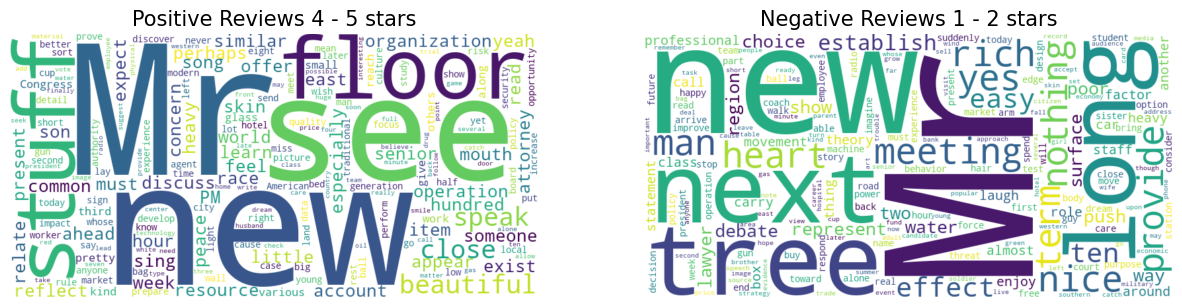

In [63]:
# positive & negative words by rating
positive_reviews = df[df["rating"] >= 4]["review"]
negative_reviews = df[df["rating"] <= 2]["review"]

positive_reviews_text = " ".join(positive_reviews)
negative_reviews_text = " ".join(negative_reviews)

positive_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_reviews_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_reviews_text)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.title("Positive Reviews 4 - 5 stars", fontsize=15)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.title("Negative Reviews 1 - 2 stars", fontsize=15)
plt.axis("off")
plt.show()

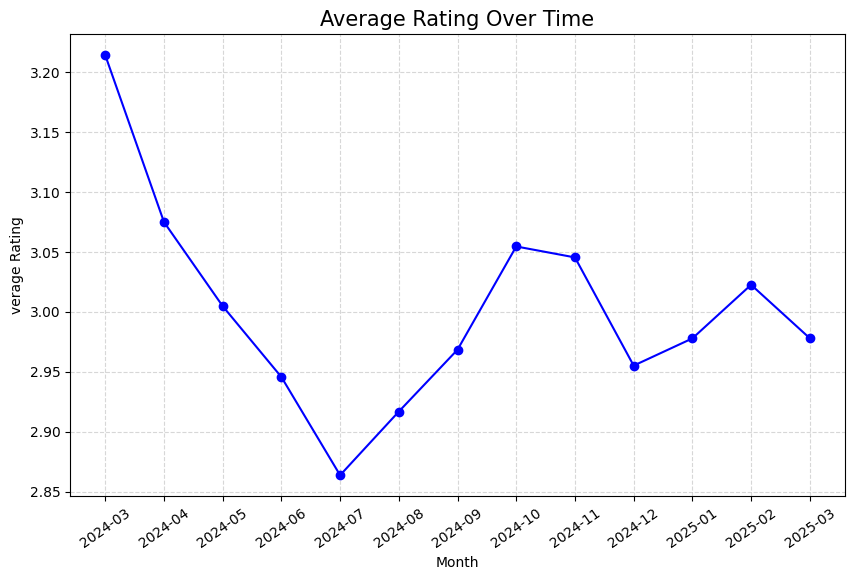

In [64]:
# Average Rating Over Time
df["month"] = df["date"].dt.to_period("M")
avg_rating_by_month = df.groupby(["month"])["rating"].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_rating_by_month.index.astype(str), avg_rating_by_month.values, marker="o", color="blue")

plt.title("Average Rating Over Time", fontsize=15)
plt.xlabel("Month")
plt.ylabel("verage Rating")
plt.xticks(rotation=35)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [65]:
# Average Rating by Country
avg_rating_by_location = df.groupby(["location"])["rating"].mean().reset_index()

fig = px.choropleth(avg_rating_by_location, 
                    locations="location",
                    locationmode="country names",
                    color="rating",
                    color_continuous_scale="Viridis", 
                    title="Average Rating by Country",
                    labels="rating")
fig.show()

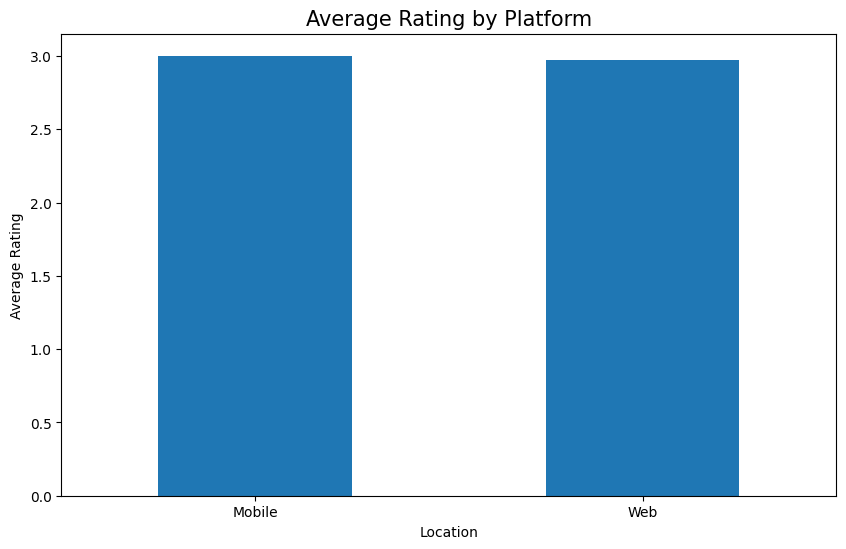

In [66]:
# Average Rating by platform
avg_rating_by_platform = df.groupby(["platform"])["rating"].mean()

plt.figure(figsize=(10, 6))
avg_rating_by_platform.plot(kind="bar")
plt.title("Average Rating by Platform", fontsize=15)
plt.xlabel("Location")
plt.ylabel("Average Rating")
plt.xticks(rotation=0)
plt.show()

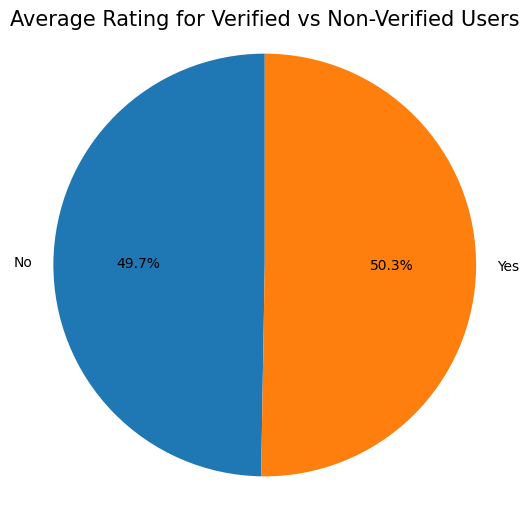

In [67]:
# Average Rating for Verified vs Non-Verified Users
avg_rating_by_purchase = df.groupby(["verified_purchase"])["rating"].mean()

plt.figure(figsize=(6, 6))
plt.pie(avg_rating_by_purchase, labels=avg_rating_by_purchase.index, autopct="%1.1f%%", startangle=90)
plt.title("Average Rating for Verified vs Non-Verified Users", fontsize=15)
plt.axis("equal")
plt.show()

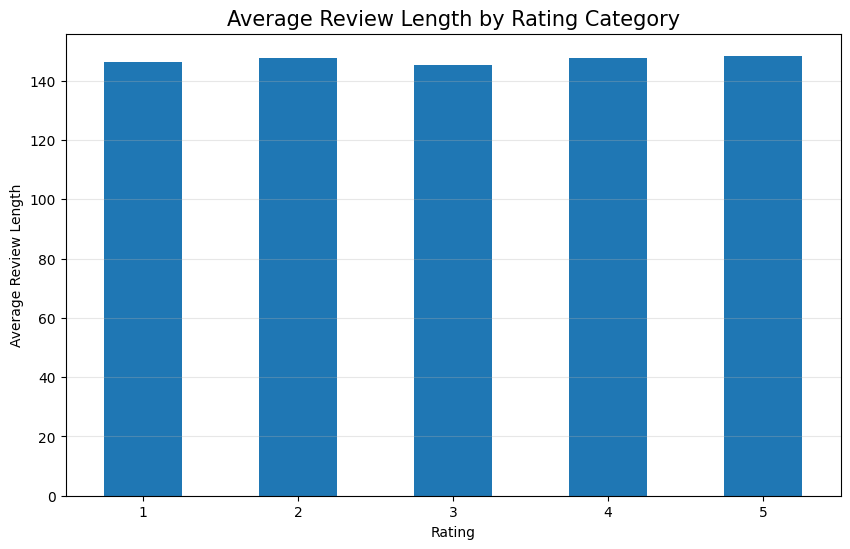

In [68]:
# Average Review Length by Rating Category
avg_rating_by_review_length = df.groupby(["rating"])["review_length"].mean()

plt.figure(figsize=(10, 6))
avg_rating_by_review_length.plot(kind="bar")
plt.title("Average Review Length by Rating Category", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Average Review Length")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="-", alpha=0.3)
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91801\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91801\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


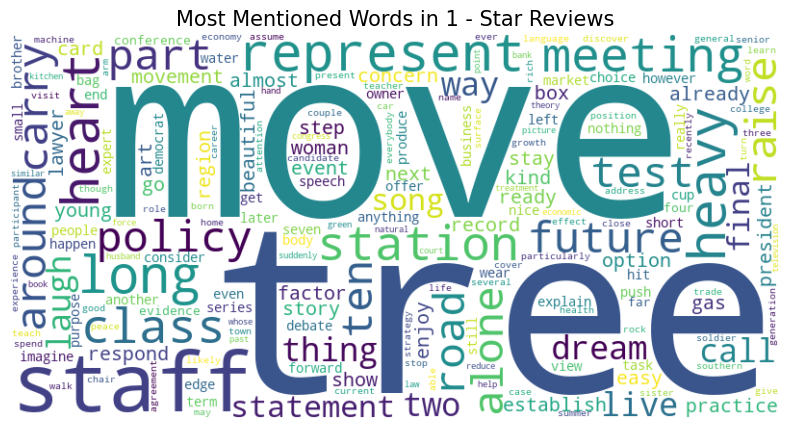

In [69]:
# Most Mentioned Words in 1 - Star Reviews
nltk.download("punkt")
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

one_star_review = df[df["rating"] == 1]["review"]

def clean_text(review):
    review = re.sub(r"[^\w\s]", "", review.lower())
    words = review.split()
    return [word for word in words if word not in stop_words]

all_words = []
for review in one_star_review:
    all_words.extend(clean_text(review))

word_freq = Counter(all_words)

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Most Mentioned Words in 1 - Star Reviews", fontsize=15)
plt.axis("off")
plt.show()

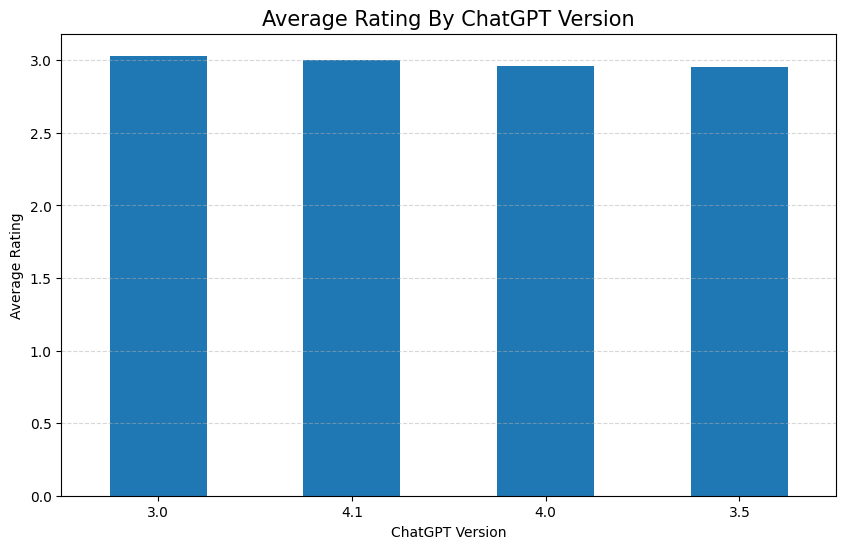

In [70]:
# Highest Chatgpt Version By Rating
avg_rating_by_version = df.groupby(["version"])["rating"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_rating_by_version.plot(kind="bar")
plt.title("Average Rating By ChatGPT Version", fontsize=15)
plt.xlabel("ChatGPT Version")
plt.ylabel("Average Rating")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

In [71]:
#-------------------------------------------------------------Text Preprocessing---------------------------------------------------------------------

# remove punks words
df["review_processed"] = df["review"].str.replace("[^a-zA-Z0-9]", " ")

In [72]:
# vectorizer this vector method assign impotant wise weight

vectorizer = TfidfVectorizer(max_features=1000)
x = vectorizer.fit_transform(df["review_processed"])
y = df["rating"]

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [74]:
y_train = y_train - 1
y_test = y_test - 1

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

max_words = 5000
max_len = 15
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dense(32, activation="softmax"),
    Dense(5, activation="softmax")
])

c:\Users\91801\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



In [76]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 604s 5s/step - accuracy: 0.1870 - loss: 1.6113 - val_accuracy: 0.2035 - val_loss: 1.6093
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 568s 5s/step - accuracy: 0.2000 - loss: 1.6099 - val_accuracy: 0.2090 - val_loss: 1.6092
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - accuracy: 0.2061 - loss: 1.6093 - val_accuracy: 0.2090 - val_loss: 1.6092
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.2074 - loss: 1.6094 - val_accuracy: 0.2090 - val_loss: 1.6092
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 398s 3s/step - accuracy: 0.2058 - loss: 1.6094 - val_accuracy: 0.2090 - val_loss: 1.6091
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.2054 - loss: 1.6095 - val_accuracy: 0.2090 - val_loss: 1.6091
Epoch 7/10
 10/125 ━━━━━━━━━━━━━━━━━━━━ 3:59 2s/step - accuracy: 0.1915 - loss: 1.6099

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Predict new reviews
sample_review = ["This product is amazing, I love it!"]
sample_seq = tokenizer.texts_to_sequences(sample_review)
sample_pad = pad_sequences(sample_seq, maxlen=max_len)
prediction = model.predict(sample_pad)

print("Sentiment Prediction:", prediction)